In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/country-to-continent/countryContinent.csv
/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
df_suicide = pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
df_suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
dfc = df_suicide.country.unique()
dfc

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

If we add the regions and continents of the countries to our data set, we will have the opportunity for more detailed analysis. Therefore, we will use an auxiliary data set from kaggle, which includes increasing country and continent information.

In [5]:
df_continent = pd.read_csv('../input/country-to-continent/countryContinent.csv')
df_continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [6]:
df_continent

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,�land Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


# Find mismatches
Before merging the two datasets, we need to detect and correct any mismatches in the country names. Let's write a function for this.

In [7]:
def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
#         if any(series_2.unique() == i):  # alternative
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(df_suicide.country, df_continent.country, True)

out : Macau
out : Republic of Korea
out : Saint Vincent and Grenadines
out : United Kingdom
out : United States
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [8]:
df_continent.loc[df_continent.country.str.contains("Maca"),'country']='Macau'
df_continent.loc[df_continent.country.str.contains("'Korea \(Republic of\)'"),'country']='Republic of Korea'
df_continent.loc[df_continent.country.str.contains("Saint Vincent and the Grenadines"),'country']='Saint Vincent and Grenadines'
df_continent.loc[df_continent.country.str.contains("United Kingdom of Great Britain and Northern Ireland"),'country']='United Kingdom'
df_continent.loc[df_continent.country.str.contains("United States of America"),'country']='United States'
mismatch(df_suicide.country, df_continent.country, True)

out : Republic of Korea
1 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [9]:
df_continent.loc[df_continent.country.str.contains("Korea \(Republic of\)"),'country'] = 'Republic of Korea'
mismatch(df_suicide.country, df_continent.country, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


# Let's merge the two datasets over the country names column.

In [10]:
df = df_suicide.merge(df_continent[['country','continent','sub_region','code_3']], left_on = 'country', right_on = 'country')
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Asia,Central Asia,UZB
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Asia,Central Asia,UZB
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB


In [11]:
print("Types: ", df.dtypes)

Types:  country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
continent              object
sub_region             object
code_3                 object
dtype: object


In [12]:
print("Shape: ", df.shape)

Shape:  (27820, 15)


In [13]:
print("Counts: ")
print(df.apply(lambda x: x.count()))

Counts: 
country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
continent             27820
sub_region            27820
code_3                27820
dtype: int64


In [14]:
print("Nulls: ")
print(df.apply(lambda x: x.isnull().sum()))

Nulls: 
country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
continent                 0
sub_region                0
code_3                    0
dtype: int64


In [15]:
print("Min: ")
print(df.min())

print("Max: ")
print(df.max())

Min: 
country                                 Albania
year                                       1985
sex                                      female
age                                 15-24 years
suicides_no                                   0
population                                  278
suicides/100k pop                           0.0
country-year                        Albania1987
HDI for year                              0.483
 gdp_for_year ($)             1,002,219,052,968
gdp_per_capita ($)                          251
generation                              Boomers
continent                                Africa
sub_region            Australia and New Zealand
code_3                                      ABW
dtype: object
Max: 
country                   Uzbekistan
year                            2016
sex                             male
age                        75+ years
suicides_no                    22338
population                  43805214
suicides/100k pop             22

In [16]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'continent',
       'sub_region', 'code_3'],
      dtype='object')

In [17]:
df = df.rename(columns = {'country':'land',
                       'year':'jaar',
                       'gdp_for_year ($)':'gdp_for_year',
                       'gdp_per_capita ($)':'gdp_per_capita'})
df.columns

Index(['land', 'jaar', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita', 'generation', 'continent',
       'sub_region', 'code_3'],
      dtype='object')

In [18]:
df

,land,jaar,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita,generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,Asia,Central Asia,UZB
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,Asia,Central Asia,UZB
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB


In [19]:
df.drop('HDI for year',axis = 1,inplace = True)
df.isnull().any().sum()

0

In [20]:
df.head()

,land,jaar,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita,generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,Europe,Southern Europe,ALB


# Dropping Unnecessary Variables
For multiple changes; df[['country', 'year', 'country-year']]

In [21]:
df[['country-year']]

,country-year
0,Albania1987
1,Albania1987
2,Albania1987
3,Albania1987
4,Albania1987
...,...
27815,Uzbekistan2014
27816,Uzbekistan2014
27817,Uzbekistan2014
27818,Uzbekistan2014


# Features Correlation of USA

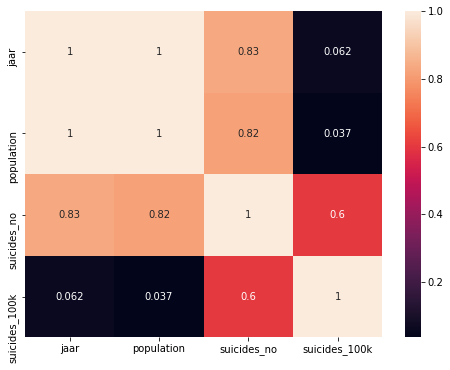

In [28]:
plt.subplots(figsize=(8,6))
sns.heatmap(df_USA.corr(), annot = True);

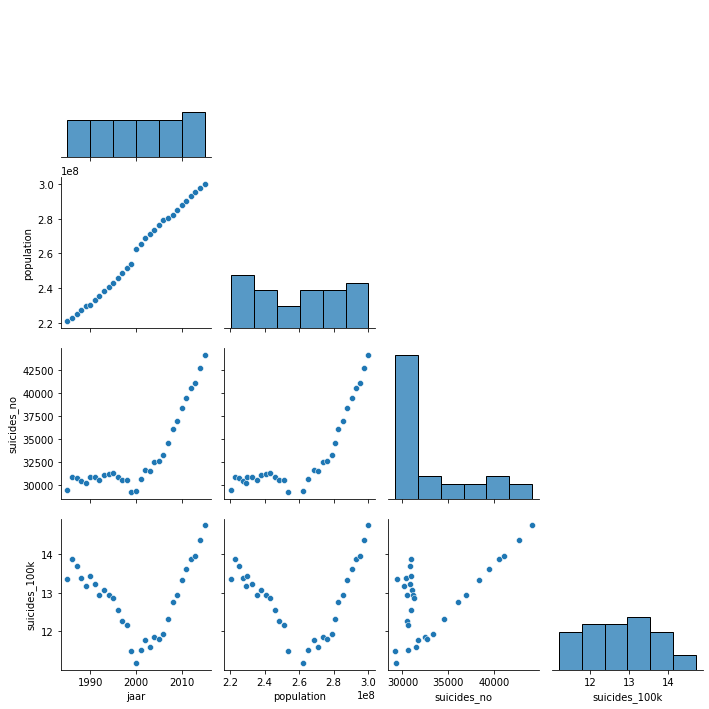

In [29]:
sns.pairplot(df_USA, corner=True);

In [45]:
df

,land,jaar,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita,generation,continent,sub_region,code_3
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent,Europe,Southern Europe,ALB
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X,Europe,Southern Europe,ALB
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe,ALB
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers,Europe,Southern Europe,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,"63,067,077,179",2309,Generation X,Asia,Central Asia,UZB
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,"63,067,077,179",2309,Silent,Asia,Central Asia,UZB
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,"63,067,077,179",2309,Generation Z,Asia,Central Asia,UZB


# Global Suicides(per 100K)-trend over time 1985-2016

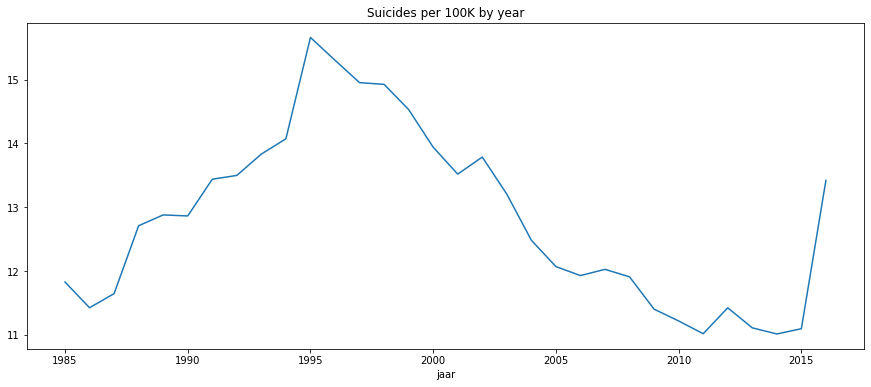

In [46]:
plt.subplots(figsize=(15,6))
df.groupby('jaar')["suicides/100k pop"].mean().plot.line(rot=0)
plt.title("Suicides per 100K by year");

# Global Suicides(per 100K) by Continent

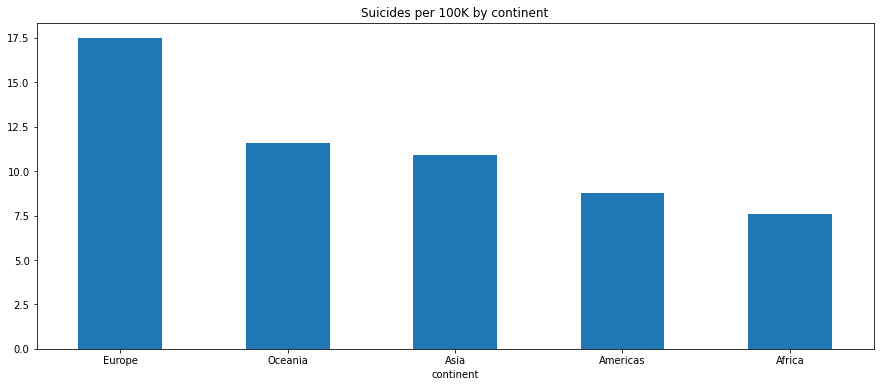

In [47]:
plt.subplots(figsize = (15,6))
df.groupby('continent')["suicides/100k pop"].mean().sort_values(ascending = False).plot.bar(rot=0)
plt.title("Suicides per 100K by continent");

# Global Suicides(per 100k) by Gender and trend over time 1985-2016

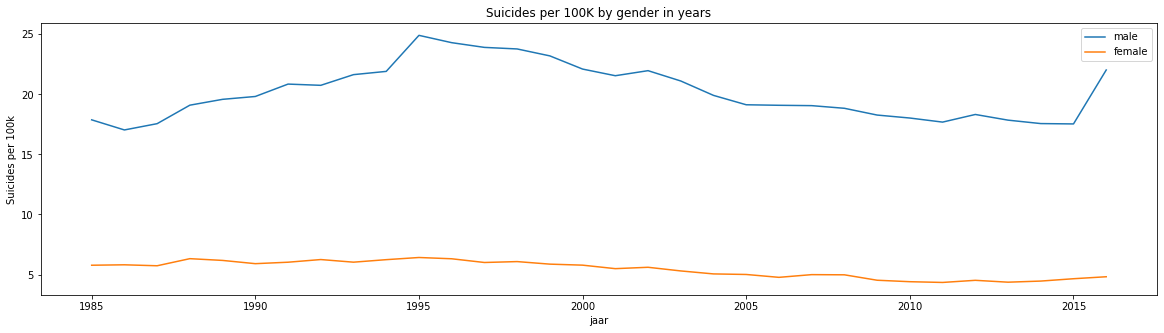

In [52]:
dfgender = pd.pivot_table(df,values= ["suicides/100k pop"], 
                     index=['sex','jaar'], aggfunc='mean').reset_index()
fig, ax = plt.subplots(figsize=(20,5))
for i in ['male','female']:
    ax = dfgender[dfgender.sex==i].groupby('jaar')["suicides/100k pop"].mean().plot(kind='line',label=i)
ax.legend(loc='upper right', borderaxespad=0.5)
ax.set_ylabel('Suicides per 100k')
ax.set_title('Suicides per 100K by gender in years')
plt.show()

# Population-gdp_per_capita Plot

In [60]:
a = df.groupby('jaar')["gdp_per_capita"].sum()
a

jaar
1985     3508548
1986     4104636
1987     5645760
1988     5870508
1989     6068424
1990     7531260
1991     7782096
1992     8195232
1993     8231796
1994     9438756
1995    11858508
1996    11600736
1997    11398596
1998    11506728
1999    12780864
2000    12865476
2001    12677892
2002    13017420
2003    15187104
2004    17895936
2005    20317212
2006    21563784
2007    24709620
2008    26936208
2009    24145248
2010    25193196
2011    26936148
2012    26058300
2013    26911368
2014    25665252
2015    19516008
2016     4106420
Name: gdp_per_capita, dtype: int64

In [61]:
b = df.groupby('jaar')["population"].sum()
b

jaar
1985    1008600086
1986    1029909613
1987    1095029726
1988    1054094424
1989    1225514347
1990    1466620100
1991    1489988384
1992    1569539447
1993    1530416654
1994    1548749372
1995    1591559103
1996    1662267662
1997    1702991519
1998    1725181351
1999    1776363155
2000    1799227908
2001    1755565489
2002    1822152815
2003    1838458020
2004    1745246613
2005    1734909645
2006    1840908837
2007    1859564353
2008    1860620851
2009    1976228366
2010    1997297329
2011    1993362332
2012    1912812088
2013    1890161710
2014    1912057309
2015    1774657932
2016     132101896
Name: population, dtype: int64

In [ ]:
c = a/b

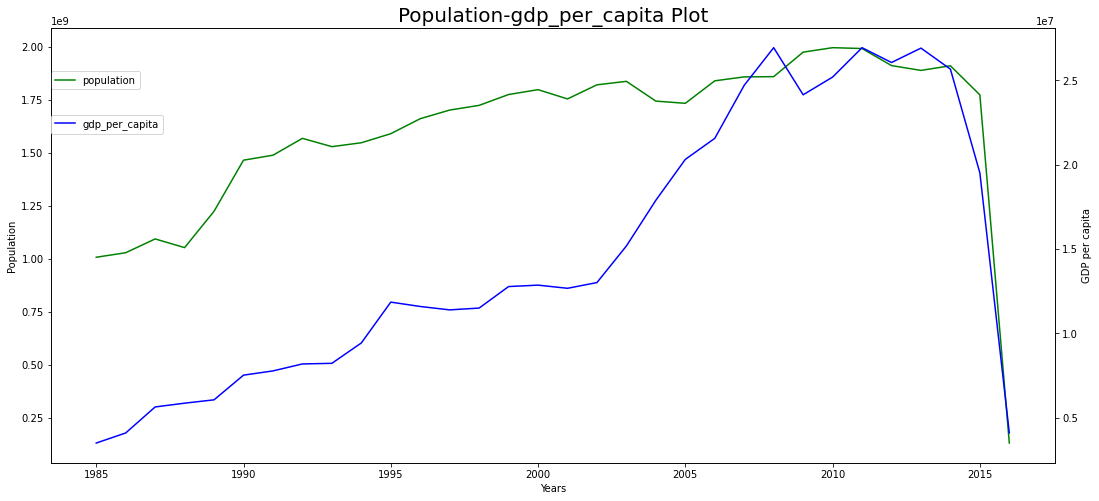

In [78]:
df2=df.copy()
df2 =df2.set_index('jaar')

fig, ax = plt.subplots(figsize=(18,8))
b.plot(ax=ax,color='g',xlabel= "Years",ylabel= "Population")
plt.legend(bbox_to_anchor=(0.0, 0.90), loc=2, borderaxespad=0.)

ax2 = ax.twinx()
a.plot(ax=ax2,color='b',ylabel='GDP per capita')
plt.legend(bbox_to_anchor=(0.0, 0.80), loc=2, borderaxespad=0.)

plt.title('Population-gdp_per_capita Plot', fontsize=20)
plt.show()

# Cinsiyete Göre İntihar Sayıları

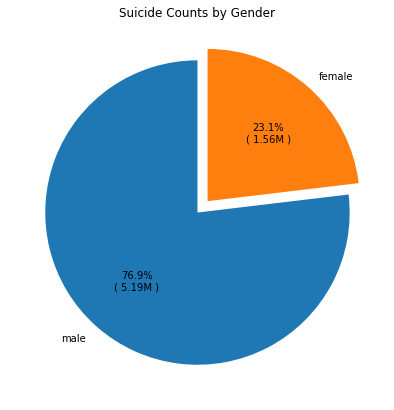

In [71]:
def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n( {:.2f}M )".format(pct,round(absolute/1000000,2))

suicide_counts_by_sex = df.groupby('sex').suicides_no.sum()

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(x = suicide_counts_by_sex.values[::-1], 
        labels=suicide_counts_by_sex.index[::-1], 
       explode=(0, 0.1),
       autopct=lambda pct: func(pct, suicide_counts_by_sex.values[::-1]),
       startangle=90)
ax.set_title("Suicide Counts by Gender");
plt.show()

In [65]:
AgeMean=[]
for i in (df.age.unique()):
    new4=df[df['age']==i]
    AgeMean.append(new4['suicides/100k pop'].mean())
AgeMean

[8.947154243860412,
 14.947440758293837,
 23.955409306333493,
 12.186884963377866,
 16.155579491598463,
 0.6200412147505419]

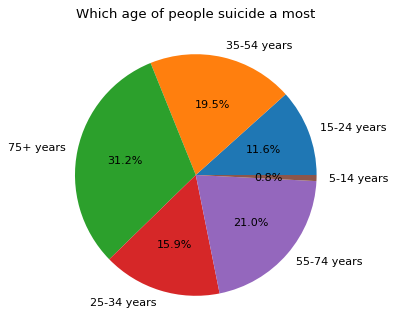

In [67]:
x=[i for i in AgeMean]
plt.figure(figsize=(10,5),dpi=80)
plt.pie(x,labels=[i for i in df.age.unique()],autopct='%1.1f%%')
plt.title('Which age of people suicide a most')
plt.show()

# Which age of people suicide a most

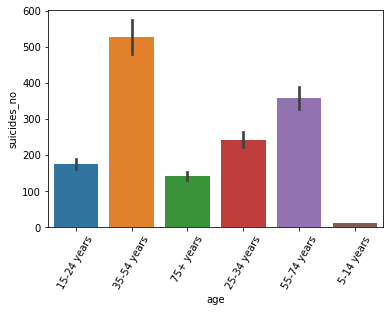

In [73]:
sns.barplot(x="age",y = 'suicides_no',data=df);
plt.xticks(rotation=60);

# Which generation of people suicide a most

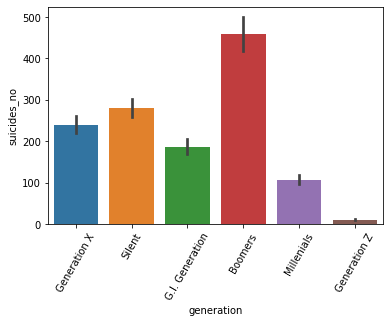

In [74]:
sns.barplot(x="generation",y = 'suicides_no',data=df);
plt.xticks(rotation=60);